In [ ]:
# Library data manipulation
import pandas as pd
import numpy as np

# Library untuk pembuatan model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk mengukur akurasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import Data

In [ ]:
df = pd.read_csv("bab6_adult_data.csv", skipinitialspace=True, header=0)

In [ ]:
df

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Data Pre-processing

Mengecek missing value

In [ ]:
print(df.isna().sum())

age               0
workclass         0
fnlwft            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64


terlihat bahwa tiap variabel tidak memiliki missing value,

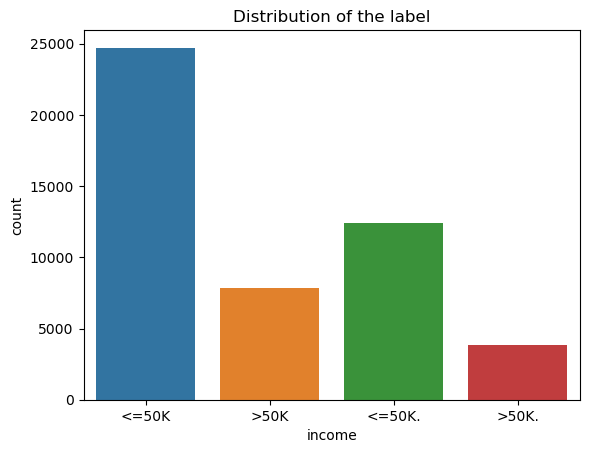

In [ ]:
# Check the distribution of the label
sns.countplot(x=df['income'], data=df)
plt.title("Distribution of the label")
plt.show()

Terlihat bahwa terdapat 4 kategorik, dimana terjadi pengulangan <=50K dengan <=50K. dan >50K dengan >50K. untuk itu variabel income yang memiliki titik(.) akan direplace sehingga akan menyatu dengan yang asli tanpa titik

In [ ]:
df['income'] = df['income'].replace('<=50K.', '<=50K')
df['income'] = df['income'].replace('>50K.', '>50K')

Cek kembali distribusi variabel respon

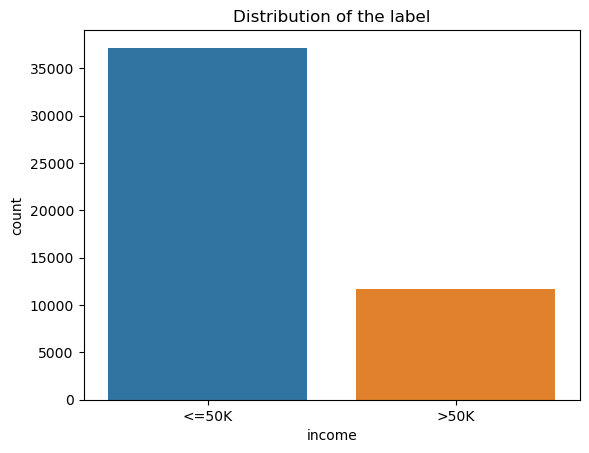

In [ ]:
# Check the distribution of the label
sns.countplot(x=df['income'], data=df)
plt.title("Distribution of the label")
plt.show()

Terlihat bahwa sudah selesai, variabel income dengan titik bergabung dengan yang tanpa titik

Drop variabel education_num karena mirip seperti variabel education

In [ ]:
#df = df.drop('education_num', axis=1)
# akan dijadikan label encoder

# Exploratory Data Analysis

Mengubah kategori pada label respon menjadi numerik

In [ ]:
df['income'] = df['income'].replace('<=50K', '1')
df['income'] = df['income'].replace('>50K', '2')
df

,age,workclass,fnlwft,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,1
48838,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,1
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,1
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,1


In [ ]:
df["income"] = df["income"].astype(int)

Melihat variabel-variabel kategorik

In [ ]:
# Define categorical columns
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]

In [ ]:
categorical_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

Melihat unique dari tiap variabel kategorik

In [ ]:
for col in categorical_cols:
  print(col)
  print(df[col].unique())
  print('')

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex
['Male' 'Female']

native_country
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'C

Ternyata masih ada missing value dari variabel workclass, occupation, dan native_country. Untuk missing value tersebut akan diisi dengan nilai modus variabel tersebut untuk masing-masing nilai data 'label'

In [ ]:
#untuk income <=50K
df_filtered1 = df[df['income'] == 1]
#untuk income >50K
df_filtered2 = df[df['income'] == 2]

<AxesSubplot:xlabel='occupation', ylabel='count'>

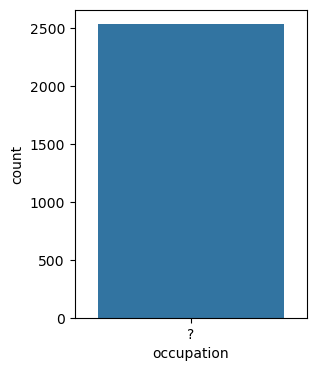

In [ ]:
# visualize workclass == ? by occupation
workclass = df_filtered1[df_filtered1['workclass'] == '?']
# visualize workclass == ? by occupation
plt.figure(figsize=(3,4))
sns.countplot(x='occupation', data=workclass)

<AxesSubplot:xlabel='workclass', ylabel='count'>

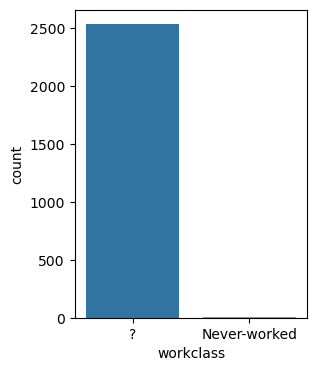

In [ ]:
# visualize workclass == ? by occupation
occupation = df_filtered1[df_filtered1['occupation'] == '?']
# visualize occupation == ? by occupation
plt.figure(figsize=(3,4))
sns.countplot(x='workclass', data=occupation)

In [ ]:
df['workclass'][(df['workclass'] == '?') & (df['occupation'] == '?') & (df['income'] == 1)] = 'Never-worked'

C:\Users\Levono\AppData\Local\Temp\ipykernel_9940\1751175935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'][(df['workclass'] == '?') & (df['occupation'] == '?') & (df['income'] == 1)] = 'Never-worked'


<AxesSubplot:xlabel='workclass', ylabel='count'>

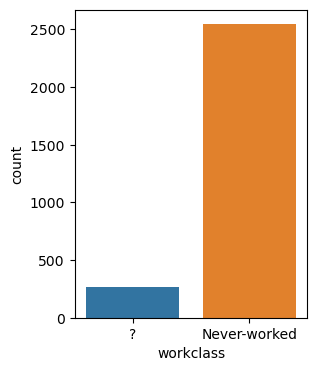

In [ ]:
# visualize workclass == ? by occupation
occupation = df[df['occupation'] == '?']
# visualize occupation == ? by occupation
plt.figure(figsize=(3,4))
sns.countplot(x='workclass', data=occupation)

<AxesSubplot:xlabel='education_num', ylabel='count'>

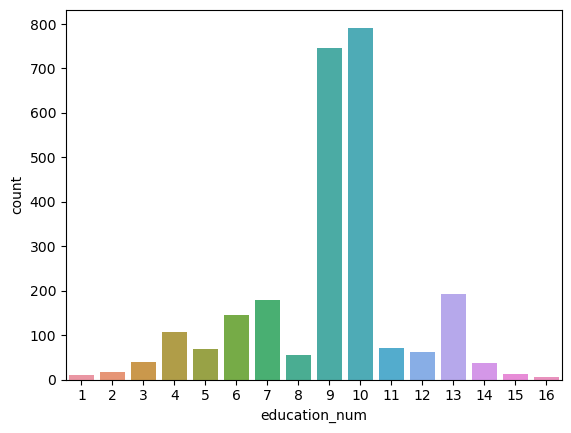

In [ ]:
mode = df[df['workclass']=='Never-worked']
sns.countplot(x= 'education_num', data = mode)

In [ ]:
df['occupation'][(df['education_num']==9) | (df['education_num']==10)].mode()[0]

'Craft-repair'

In [ ]:
df['occupation'][(df['occupation'] == '?') & (df['income']==1)] = 'Other'

C:\Users\Levono\AppData\Local\Temp\ipykernel_9940\1136955573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['occupation'][(df['occupation'] == '?') & (df['income']==1)] = 'Other'


<AxesSubplot:xlabel='occupation', ylabel='count'>

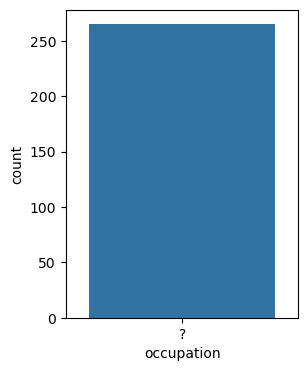

In [ ]:
# visualize workclass == ? by occupation
workclass2 = df_filtered2[df_filtered2['workclass'] == '?']
# visualize workclass == ? by occupation
plt.figure(figsize=(3,4))
sns.countplot(x='occupation', data=workclass2)

<AxesSubplot:xlabel='workclass', ylabel='count'>

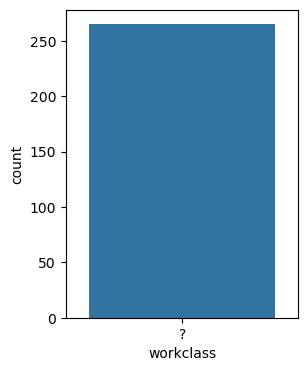

In [ ]:
# visualize workclass == ? by occupation
occupation2 = df_filtered2[df_filtered2['occupation'] == '?']
# visualize occupation == ? by occupation
plt.figure(figsize=(3,4))
sns.countplot(x='workclass', data=occupation2)

<AxesSubplot:xlabel='education_num', ylabel='count'>

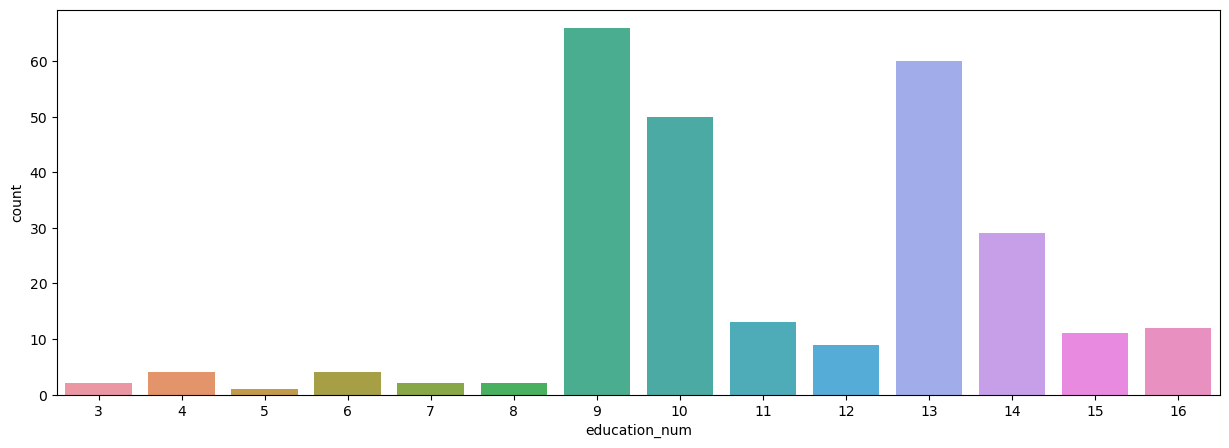

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='education_num', data=workclass2)

<AxesSubplot:xlabel='education_num', ylabel='count'>

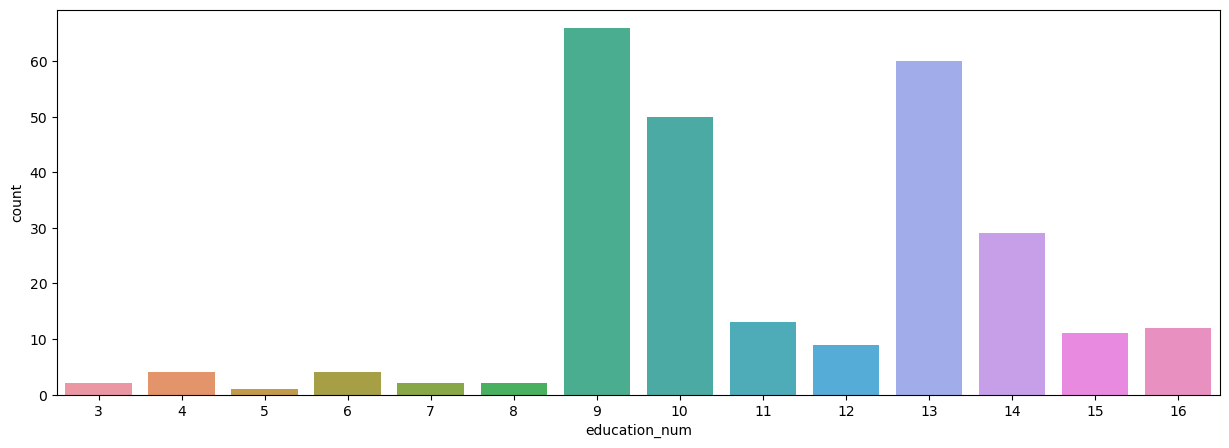

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='education_num', data=occupation2)

In [ ]:
df_filtered2['workclass'].mode()[0]

'Private'

In [ ]:
df_filtered2['occupation'].mode()[0]

'Exec-managerial'

In [ ]:
df.loc[(df['workclass'] == '?') & (df['income'] == 2), 'workclass'] = 'Private'
df.loc[(df['occupation'] == '?') & (df['income'] == 2), 'occupation'] = 'Exec-managerial'

<AxesSubplot:xlabel='race', ylabel='count'>

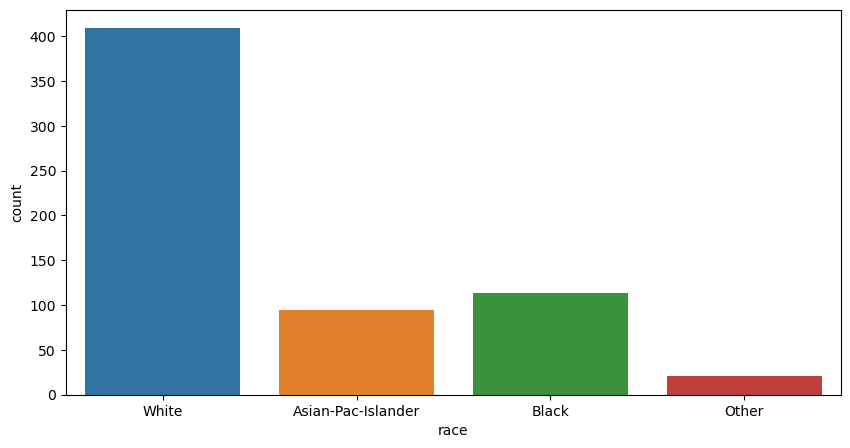

In [ ]:
# visualize workclass == ? by occupation
country = df_filtered1[df_filtered1['native_country'] == '?']
# visualize occupation == ? by occupation
plt.figure(figsize=(10,5))
sns.countplot(x='race', data=country)

<AxesSubplot:xlabel='race', ylabel='count'>

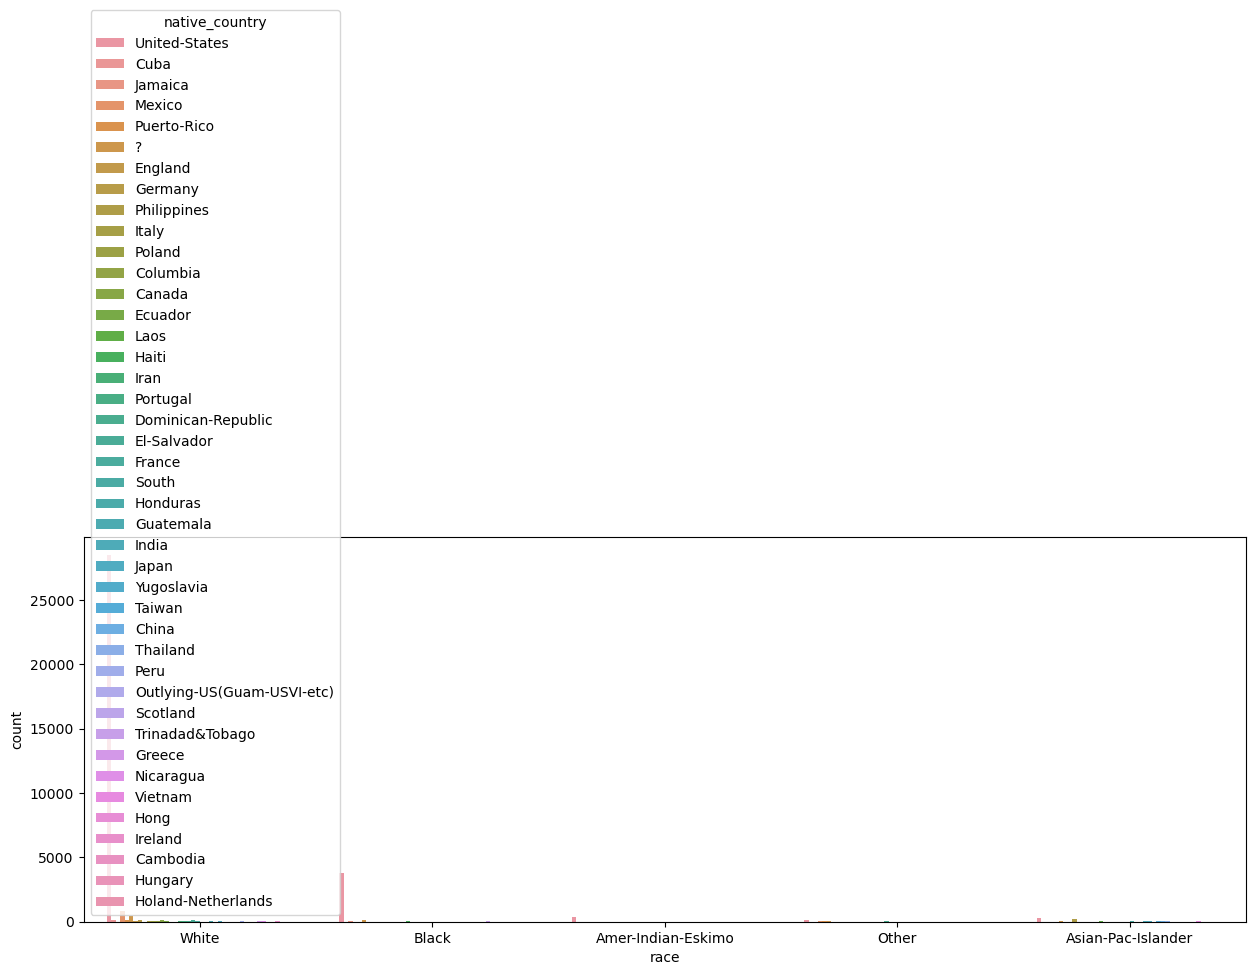

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='race', hue = 'native_country',data=df_filtered1)

<AxesSubplot:xlabel='race', ylabel='count'>

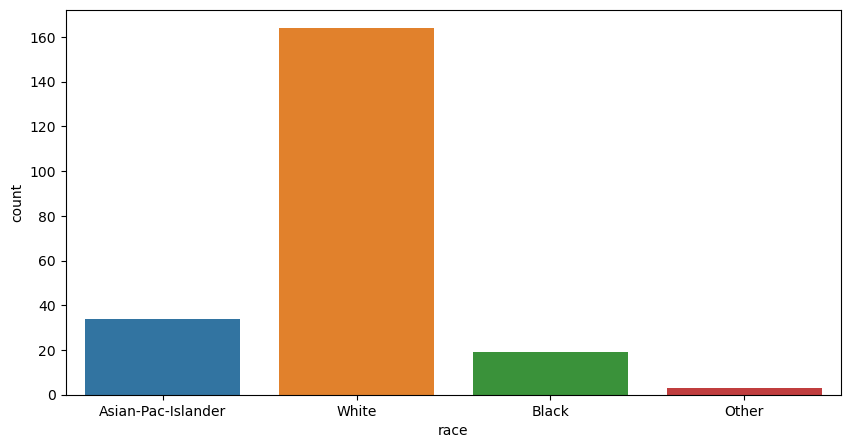

In [ ]:
# visualize workclass == ? by occupation
country2 = df_filtered2[df_filtered2['native_country'] == '?']
# visualize occupation == ? by occupation
plt.figure(figsize=(10,5))
sns.countplot(x='race', data=country2)

<AxesSubplot:xlabel='race', ylabel='count'>

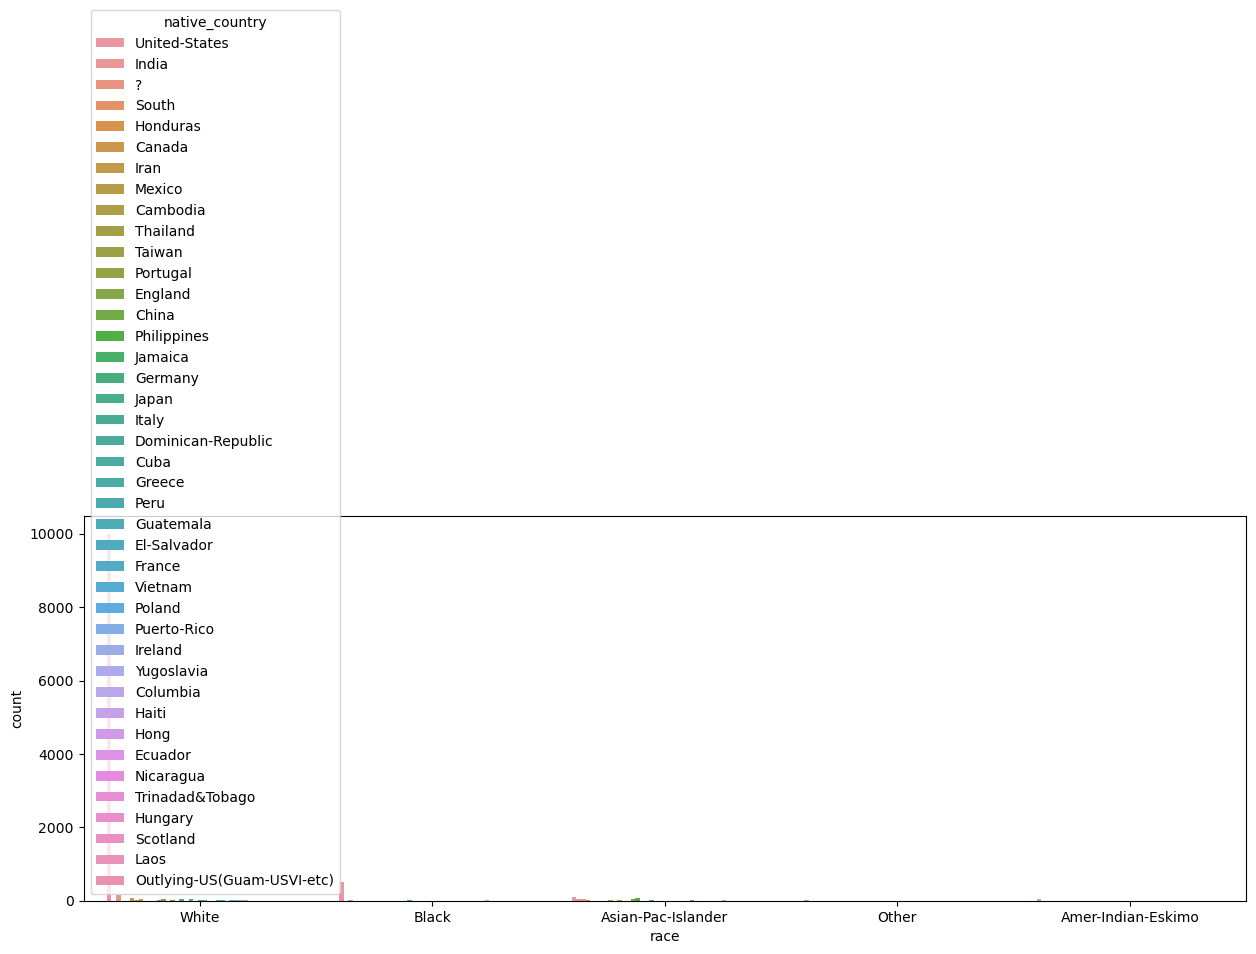

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='race', hue = 'native_country',data=df_filtered2)

In [ ]:
df.loc[(df['native_country'] == '?') & (df['income'] == 1), 'native_country'] = 'United-States'
df.loc[(df['native_country'] == '?') & (df['income'] == 2), 'native_country'] = 'United-States'

Mengubah tiap data yang berisi '?' dengan 'NULL' untuk diisi missing value

In [ ]:
df.replace('?', np.nan, inplace=True)

Mengisi missing value berdasarkan modus variabel tersebut dari tiap label

Cek missing value lagi

In [ ]:
df.isna().sum()

age               0
workclass         0
fnlwft            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours-per-week    0
native_country    0
income            0
dtype: int64

In [ ]:
df = df.drop('education', axis =1)

Sudah tidak ada missing value yey

Melihat variabel numerik

In [ ]:
# Define numerical columns
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname != 'income']
# Checking the numerical columns
numerical_cols

['age',
 'fnlwft',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours-per-week']

In [ ]:
df['diff_capital'] = df['capital_gain'] - df['capital_loss']

In [ ]:
df.corr()['income'].sort_values(ascending=False)

income            1.000000
education_num     0.332613
age               0.230369
hours-per-week    0.227687
capital_gain      0.223013
diff_capital      0.214356
capital_loss      0.147554
fnlwft           -0.006339
Name: income, dtype: float64

In [ ]:
df = df.drop('fnlwft', axis=1)

Membuat dummy variable, yakni mengubah variabel kategorik menjadi numerik dengan OHE

In [ ]:
# One hot encoding for categorical columns
OR_encoder = OneHotEncoder()
# Fit and transform the categorical columns
categorical_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
df_cat_encoded = OR_encoder.fit_transform(df[categorical_cols])
# Assign to dfframe
df_cat_encoded = pd.DataFrame(df_cat_encoded.toarray(), columns=OR_encoder.get_feature_names_out(categorical_cols))

In [ ]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname != 'income']

In [ ]:
# Joining the numerical and categorical dfframes
df_encoded = pd.concat([df[numerical_cols], df_cat_encoded], axis=1)

# Check the result
df_encoded.head()

,age,education_num,capital_gain,capital_loss,hours-per-week,diff_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,2174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0,0,13,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded = pd.concat([df_encoded, df['income']], axis=1)

In [ ]:
"""# get feaatures with correlastion more than 0.05
correlation = df_encoded.corr()
correlation = correlation['income'].sort_values(ascending=False, key=abs)
features1 = correlation[correlation > 0.1].index
features2 = correlation[correlation < -0.1].index"""

"# get feaatures with correlastion more than 0.05\ncorrelation = df_encoded.corr()\ncorrelation = correlation['income'].sort_values(ascending=False, key=abs)\nfeatures1 = correlation[correlation > 0.1].index\nfeatures2 = correlation[correlation < -0.1].index"

In [ ]:
"""features = features1.append(features2)
features"""

'features = features1.append(features2)\nfeatures'

Splitting Data

In [ ]:
y = df.income
X = df_encoded.drop('income', axis=1)

In [ ]:
df_encoded#

,age,education_num,capital_gain,capital_loss,hours-per-week,diff_capital,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income
0,39,13,2174,0,40,2174,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,50,13,0,0,13,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,38,9,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,53,7,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,28,13,0,0,40,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,0,36,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48838,64,9,0,0,40,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48839,38,13,0,0,50,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
48840,44,13,5455,0,40,5455,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = (train_test_split(X,y,test_size=0.3, stratify=y, random_state=50))

Melakukan standardisasi kepada data numerik

In [ ]:
"""from sklearn.preprocessing import StandardScaler

# Membuat objek StandardScaler
scaler = StandardScaler().fit(X_train[numerical_cols])

# Mengambil semua kolom numerik
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# Melakukan scaling pada kolom numerik
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])"""

'from sklearn.preprocessing import StandardScaler\n\n# Membuat objek StandardScaler\nscaler = StandardScaler().fit(X_train[numerical_cols])\n\n# Mengambil semua kolom numerik\nnumeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()\n\n# Melakukan scaling pada kolom numerik\nX_train[numerical_cols] = scaler.transform(X_train[numerical_cols])\nX_test[numerical_cols] = scaler.transform(X_test[numerical_cols])'

Melakukan SMOTE (Synthetic Minority Over-sampling Technique) pada data train sebab terjadi ketidakseimbangan jumlah label pada variabel respon, yakni label <=50K jauh lebih banyak daripada >50K

In [ ]:
"""from imblearn.under_sampling import RandomUnderSampler
# Balancing the training data using SMOTE
smote = RandomUnderSampler(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)"""

'from imblearn.under_sampling import RandomUnderSampler\n# Balancing the training data using SMOTE\nsmote = RandomUnderSampler(random_state=42)\nX_train, y_train = smote.fit_resample(X_train, y_train)'

Modelling dengan parameter terbaik berdasarkan GridsearchCV

In [ ]:
rf1 = RandomForestClassifier(n_estimators=200, random_state=42, max_features='sqrt', min_samples_leaf=2, min_samples_split=10)

model = rf1.fit(X_train, y_train)


In [ ]:
# Predict the test set
Y_pred = rf1.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.89      0.95      0.92     11147
           2       0.79      0.62      0.69      3506

    accuracy                           0.87     14653
   macro avg       0.84      0.78      0.81     14653
weighted avg       0.86      0.87      0.86     14653



Rangkuman dibawah sendiri

Modelling dengan parameter terbaik berdasarkan RandomizedSearchCV

In [ ]:
rf2 = RandomForestClassifier(n_estimators=190, random_state=42, max_features='sqrt', min_samples_leaf=1, min_samples_split=15, bootstrap=True)

model = rf2.fit(X_train, y_train)


In [ ]:
# Predict the test set
Y_pred = rf2.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.89      0.94      0.91     11147
           2       0.77      0.63      0.69      3506

    accuracy                           0.87     14653
   macro avg       0.83      0.78      0.80     14653
weighted avg       0.86      0.87      0.86     14653



Modelling dengan parameter terbaik berdasarkan Bayesian Optimization

In [ ]:
rf3 = RandomForestClassifier(n_estimators=1000, random_state=42, max_features='sqrt', min_samples_leaf=1, min_samples_split=10,max_depth=10)

model = rf3.fit(X_train, y_train)

In [ ]:
# Predict the test set
Y_pred = model.predict(X_test)

# Check the classification report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.87      0.96      0.91     11147
           2       0.81      0.55      0.66      3506

    accuracy                           0.86     14653
   macro avg       0.84      0.76      0.79     14653
weighted avg       0.86      0.86      0.85     14653



Intepretasi :
Berdasarkan hasil hyperparameter tunning dengan metode GridSearchCV dan RandomizedSearchCV di atas, terlihat bahwa terjadi peningkatan nilai F1-Score berdasarkan macro avg sebesar 1%, Hal ini menunjukkan model menjadi semakin baik (improvement model). Sedangkan dengan menggunakan metode Bayesian Optimization malah terjadi penurunan F1-Score.

Feature Importance

Berdasarkan metode GridSearchCV

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf1.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance

,feature,importance
0,marital_status_Married-civ-spouse,1.341351e-01
1,education_num,1.224269e-01
2,diff_capital,1.204109e-01
3,capital_gain,9.920074e-02
4,age,8.677966e-02
...,...,...
85,native_country_Hungary,1.056250e-05
86,native_country_Thailand,8.476933e-06
87,native_country_Outlying-US(Guam-USVI-etc),8.074112e-06
88,native_country_Honduras,9.844883e-08


Berdasarkan metode RandomizedSearchCV

In [ ]:
# Feature importance
feature_importance2 = pd.DataFrame({'feature': X_train.columns, 'importance': rf2.feature_importances_})
feature_importance2 = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)
feature_importance2

,feature,importance
0,marital_status_Married-civ-spouse,1.341351e-01
1,education_num,1.224269e-01
2,diff_capital,1.204109e-01
3,capital_gain,9.920074e-02
4,age,8.677966e-02
...,...,...
85,native_country_Hungary,1.056250e-05
86,native_country_Thailand,8.476933e-06
87,native_country_Outlying-US(Guam-USVI-etc),8.074112e-06
88,native_country_Honduras,9.844883e-08


# Rangkuman
1. Duplicate data tidak dihapus karena katanya kalo hapus baris, hapus yang data train aja. (aga ribet)
2. Untuk Imputasi missing value (data == ?):
    - Income <50:
        * workclass = never-worked
        * occupation = other (kategori baru)
        * native_country = modus
    - Income >50:
        * workclass = modus
        * occupation = modus
        * native_country = modus
3. drop kolom education, kita pakai yang education_num karena sama aja kayak labelencoder
4. drop kolom fnlfgt karena korelasi jelek
5. Bikin kolom diff_capital = capital_gain - capital_loss
6. Encode OneHot kolom kategorik
7. Percobaan kali ini no scaler no balancing. (karena dh naik, capekk huhu)